### Importing Packages

In [1]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd
import numpy as np
from time import sleep
from random import randint
import matplotlib.pyplot as plt
%matplotlib inline

### Setting Up Base URLs

In [2]:
urlbase_2019 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Marathon/2019-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='
urlbase_2018 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Marathon/2018-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='
urlbase_2017 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Marathon/2017-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='
urlbase_2016 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Marathon/2016-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='
urlbase_half_2019 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Half-Marathon/2019-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='
urlbase_half_2018 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Half-Marathon/2018-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='
urlbase_half_2017 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Half-Marathon/2017-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='
urlbase_half_2016 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Half-Marathon/2016-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='

In [3]:
response_f19 = requests.post(urlbase_2019 + '1')

response_f19.status_code

200

In [4]:
soup_f19 = BeautifulSoup(response_f19.content, 'lxml')
print(soup_f19.title)
print(soup_f19)

<title> | Rock n Roll Marathon Series | Marathon Half Marathon Events</title>
<!DOCTYPE html>
<!--[if IE 9]><html lang="en" class="ie9 no-js"><![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<script src="/cdn-cgi/apps/head/u7S6kWy3Cysuih2qEtS0XdJlwiE.js"></script><link href="/styles/vendor.min.css" rel="stylesheet"/>
<link href="/styles/rnr.min.css" rel="stylesheet"/>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<title> | Rock n Roll Marathon Series | Marathon Half Marathon Events</title>
<meta content="" property="og:title"/>
<meta content="" property="og:image"/>
<meta content="" property="og:description"/>
<meta content="https://www.runrocknroll.com:443/en/Events/Nashville/The Races/Marathon/2019 Results" property="og:url"/>
<script>
        (function (w, d, s, l, i) {
            w[l] = w

In [5]:
table_f19 = soup_f19.find_all(attrs = {'class': 'row', 'class':'row race-search-res-container'})
table_f19

[<div class="row race-search-res-container">
 <div class="race-search-res-div-main col-xs-12">
 <h2><br/><small>Saturday, April 27, 2019</small></h2>
 <div class="race-search-main col-xs-12">
 <div class="race-search-top10-div">
 <table class="table table-responsive table-bordered">
 <tr>
 <th class="table-place">Overall</th>
 <th class="table-place">Bib</th>
 <th class="table-name">Name</th>
 <th class="table-time">Time</th>
 </tr>
 <tr>
 <td>1</td>
 <td>30001</td>
 <td><a href="/en/Events/Nashville/The-Races/Marathon/2019-Results/Athlete?id=30001">Travis Peruski</a></td>
 <td>01:37:54</td>
 </tr>
 <tr>
 <td>2</td>
 <td>1</td>
 <td><a href="/en/Events/Nashville/The-Races/Marathon/2019-Results/Athlete?id=1">Scott Wietecha</a></td>
 <td>02:34:59</td>
 </tr>
 <tr>
 <td>3</td>
 <td>4</td>
 <td><a href="/en/Events/Nashville/The-Races/Marathon/2019-Results/Athlete?id=4">Jordan Wilson</a></td>
 <td>02:35:24</td>
 </tr>
 <tr>
 <td>4</td>
 <td>30034</td>
 <td><a href="/en/Events/Nashville/The-

In [6]:
result_list = pd.read_html(str(table_f19[0])) # a list of dataframes
len(result_list)

1

In [7]:
full_19_1 = result_list[0]  # get the first df from the list
full_19_1.head(40)

,Overall,Bib,Name,Time
0,1,30001,Travis Peruski,01:37:54
1,2,1,Scott Wietecha,02:34:59
2,3,4,Jordan Wilson,02:35:24
3,4,30034,Steelton Flynn,02:39:59
4,5,30035,Thomas Ellis,02:42:09
5,6,33172,Nicholas Tseffos,02:48:42
6,7,30053,Satoshi Mitsumori,02:50:33
7,8,30051,Harrison Kieffer,02:51:18
8,9,30086,Steven Forte,02:54:34
9,10,30042,Grant Rice,02:55:49


### Full Marathon 19

In [8]:

pages1 = np.arange(2, 114, 1)
for page1 in pages1: 
  full_19_1
 
  newurl1 = urlbase_2019 + str(page1)
  
  page1 = requests.post(newurl1)
  
  soup_f19 = BeautifulSoup(page1.content, 'lxml')

  table_f19 = soup_f19.find_all('table', attrs = {'class':'table table-responsive table-bordered'})   

  result_list = pd.read_html(str(table_f19[0]))

  marathon_page1 = result_list[0]
    
  full_19_1 = full_19_1.append(marathon_page1, ignore_index = True)



In [9]:
full_19_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811 entries, 0 to 2810
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Overall  2811 non-null   int64 
 1   Bib      2811 non-null   int64 
 2   Name     2811 non-null   object
 3   Time     2811 non-null   object
dtypes: int64(2), object(2)
memory usage: 88.0+ KB


In [10]:
full_19_1

,Overall,Bib,Name,Time
0,1,30001,Travis Peruski,01:37:54
1,2,1,Scott Wietecha,02:34:59
2,3,4,Jordan Wilson,02:35:24
3,4,30034,Steelton Flynn,02:39:59
4,5,30035,Thomas Ellis,02:42:09
...,...,...,...,...
2806,99999,31741,Erica Cruz,00:00:00
2807,99999,32960,Christine Zavala,00:00:00
2808,99999,31659,Yaa Asare,00:00:00
2809,99999,32497,Brian Miller,00:00:00


In [11]:
Full_Marathon_19 = full_19_1[full_19_1['Time'] > '00:00:00']

In [12]:
Full_Marathon_19

,Overall,Bib,Name,Time
0,1,30001,Travis Peruski,01:37:54
1,2,1,Scott Wietecha,02:34:59
2,3,4,Jordan Wilson,02:35:24
3,4,30034,Steelton Flynn,02:39:59
4,5,30035,Thomas Ellis,02:42:09
...,...,...,...,...
2020,2021,32032,Casey Thomaston,06:29:57
2021,2022,33147,Deanna Alexander,06:30:17
2022,2023,32980,Daniel Albert,06:35:52
2023,2024,30113,Jacqueline Spires,06:36:58


### Half Marathon 19

In [13]:
response_h19 = requests.post(urlbase_half_2019 + '1')
soup_h19 = BeautifulSoup(response_h19.content, 'lxml')
table_h19 = soup_h19.find_all(attrs = {'class': 'row', 'class':'row race-search-res-container'})
result_list = pd.read_html(str(table_h19[0]))
half_19_1 = result_list[0]

In [14]:
pages8 = np.arange(2, 691, 1)
for page8 in pages8: 
  half_19_1

  newurl8 = urlbase_half_2019 + str(page8)
  
  page8 = requests.post(newurl8)
  
  soup_h19 = BeautifulSoup(page8.content, 'lxml')

  table_h19 = soup_h19.find_all('table', attrs = {'class':'table table-responsive table-bordered'})   

  result_list = pd.read_html(str(table_h19[0]))

  marathon_page8 = result_list[0]
    
  half_19_1 = half_19_1.append(marathon_page8, ignore_index = True)

In [15]:
Half_Marathon_19 = half_19_1[half_19_1['Time'] > '00:00:00']
Half_Marathon_19 = half_19_1[half_19_1['Overall'] < 99999]
Half_Marathon_19

,Overall,Bib,Name,Time
0,1,31,Nick French,01:10:03
1,2,33,Ian Bordelon,01:12:15
2,3,32,Chris Demetra,01:12:52
3,4,1025,Grayson Reid,01:15:10
4,5,34,Jason Vincze,01:17:01
...,...,...,...,...
13701,13702,10899,Matthew Mcmullin,04:48:27
13702,13703,17926,Destinie Bean,04:57:21
13703,13704,1164,Katie Dillard,04:57:21
13704,13705,13216,Porsche Baileybrown,05:03:35


### Full Marathon 18

In [16]:
response_f18 = requests.post(urlbase_2018 + '1')
soup_f18 = BeautifulSoup(response_f18.content, 'lxml')
table_f18 = soup_f18.find_all(attrs = {'class': 'row', 'class':'row race-search-res-container'})
result_list = pd.read_html(str(table_f18[0]))
full_18_1 = result_list[0]

In [17]:
pages2 = np.arange(2, 86, 1)
for page2 in pages2: 
  full_18_1
 
  newurl2 = urlbase_2018 + str(page2)
  
  page2 = requests.post(newurl2)
  
  soup_f18 = BeautifulSoup(page2.content, 'lxml')

  table_f18 = soup_f18.find_all('table', attrs = {'class':'table table-responsive table-bordered'})   

  result_list = pd.read_html(str(table_f18[0]))

  marathon_page2 = result_list[0]
    
  full_18_1 = full_18_1.append(marathon_page2, ignore_index = True)


In [18]:
Full_Marathon_18 = full_18_1[full_18_1['Time'] > '00:00:00']
Full_Marathon_18

,Overall,Bib,Name,Time
0,1,1,Scott Wietecha,02:28:16
1,2,3,Garang Madut,02:29:52
2,3,33442,Kevin Fink,02:38:59
3,4,33441,Andrew Hodges,02:43:59
4,5,30028,Nicholas Aubert,02:48:11
...,...,...,...,...
2102,2103,535,Jane Tao,06:49:26
2103,2104,529,Mike Emerick,06:51:23
2104,2105,60042,Contact Sportstats,06:51:55
2105,2106,33359,Theresa Khayyam,06:51:56


### Half Marathon 18

In [19]:
response_h18 = requests.post(urlbase_half_2018 + '1')
soup_h18 = BeautifulSoup(response_h18.content, 'lxml')
table_h18 = soup_h18.find_all(attrs = {'class': 'row', 'class':'row race-search-res-container'})
result_list = pd.read_html(str(table_h18[0]))
half_18_1 = result_list[0]

In [20]:
pages7 = np.arange(2, 599, 1)
for page7 in pages7: 
  half_18_1

  newurl7 = urlbase_half_2018 + str(page7)
  
  page7 = requests.post(newurl7)
  
  soup_h18 = BeautifulSoup(page7.content, 'lxml')

  table_h18 = soup_h18.find_all('table', attrs = {'class':'table table-responsive table-bordered'})   

  result_list = pd.read_html(str(table_h18[0]))

  marathon_page7 = result_list[0]
    
  half_18_1 = half_18_1.append(marathon_page7, ignore_index = True)

In [21]:
Half_Marathon_18 = half_18_1[half_18_1['Time'] > '00:00:00']
Half_Marathon_18 = half_18_1[half_18_1['Overall'] < 99999]
Half_Marathon_18

,Overall,Bib,Name,Time
0,1,103,Roosevelt Cook,01:09:25
1,2,107,Lucas Cotter,01:09:51
2,3,105,Nick French,01:10:38
3,4,106,Jason Vincze,01:11:50
4,5,104,Joseph Elsakr,01:13:28
...,...,...,...,...
14935,14935,8337,Kayleah Maddock,06:04:28
14936,14937,32614,Kim Donaldson,06:05:35
14937,14938,31720,Pamela Hagens,06:12:15
14938,14939,33664,Fatima Rego,06:12:24


### Full Marathon 17

In [22]:
response_f17 = requests.post(urlbase_2017 + '1')
soup_f17 = BeautifulSoup(response_f17.content, 'lxml')
table_f17 = soup_f17.find_all(attrs = {'class': 'row', 'class':'row race-search-res-container'})
result_list = pd.read_html(str(table_f17[0]))
full_17_1 = result_list[0]

In [23]:
pages3 = np.arange(2, 148, 1)
for page3 in pages3: 
  full_17_1

  newurl3 = urlbase_2017 + str(page3)
  
  page3 = requests.post(newurl3)
  
  soup_f17 = BeautifulSoup(page3.content, 'lxml')

  table_f17 = soup_f17.find_all('table', attrs = {'class':'table table-responsive table-bordered'})   

  result_list = pd.read_html(str(table_f17[0]))

  marathon_page3 = result_list[0]
    
  full_17_1 = full_17_1.append(marathon_page3, ignore_index = True)

In [24]:
Full_Marathon_17 = full_17_1[full_17_1['Time'] > '00:00:00' ] 
Full_Marathon_17 = full_17_1[full_17_1['Overall'] < 99999]
Full_Marathon_17

,Overall,Bib,Name,Time
0,1,1,Scott Wietecha,02:40:25
1,2,1145,Ryan Regnier,02:56:28
2,3,1147,Daniel Everett,03:00:55
3,4,1029,Khris Vickroy,03:04:47
4,5,1119,Marcus Dilallo,03:04:53
...,...,...,...,...
2461,2462,4139,Maria Shircel,06:26:11
2462,2463,24211,Josan Rivera,06:26:33
2463,2464,26272,Daniel Martinez,06:30:24
2464,2465,429,Dan Albert,06:38:15


### Half Marathon 17

In [25]:
response_h17 = requests.post(urlbase_half_2017 + '1')
soup_h17 = BeautifulSoup(response_h17.content, 'lxml')
table_h17 = soup_h17.find_all(attrs = {'class': 'row', 'class':'row race-search-res-container'})
result_list = pd.read_html(str(table_h17[0]))
half_17_1 = result_list[0]

In [26]:
pages6 = np.arange(2, 893, 1)
for page6 in pages6: 
  half_17_1

  newurl6 = urlbase_half_2017 + str(page6)
  
  page6 = requests.post(newurl6)
  
  soup_h17 = BeautifulSoup(page6.content, 'lxml')

  table_h17 = soup_h17.find_all('table', attrs = {'class':'table table-responsive table-bordered'})   

  result_list = pd.read_html(str(table_h17[0]))

  marathon_page6 = result_list[0]
    
  half_17_1 = half_17_1.append(marathon_page6, ignore_index = True)

In [27]:
Half_Marathon_17 = half_17_1[half_17_1['Time'] > '00:00:00']
Half_Marathon_17 = half_17_1[half_17_1['Overall'] < 99999]
Half_Marathon_17

,Overall,Bib,Name,Time
0,1,202,Tyler Andrews,01:10:58
1,2,204,Bill Martin,01:11:25
2,3,206,Nick French,01:11:42
3,4,201,Roosevelt Cook,01:13:20
4,5,1655,Erick Kigen,01:14:56
...,...,...,...,...
17694,17882,40061,Alex Smith,05:12:34
17695,17883,10137,Alexa Karpinski,05:29:31
17696,17884,12020,Joshua Lampert,05:51:05
17697,17885,27265,Monica Ritchie,05:52:54


### Full Marathon 16

In [28]:
response_f16 = requests.post(urlbase_2016 + '1')
soup_f16 = BeautifulSoup(response_f16.content, 'lxml')
table_f16 = soup_f16.find_all(attrs = {'class': 'row', 'class':'row race-search-res-container'})
result_list = pd.read_html(str(table_f16[0]))
full_16_1 = result_list[0]

In [29]:
pages4 = np.arange(2, 156, 1)
for page4 in pages4: 
  full_16_1

  newurl4 = urlbase_2016 + str(page4)
  
  page4 = requests.post(newurl4)
  
  soup_f16 = BeautifulSoup(page4.content, 'lxml')

  table_f16 = soup_f16.find_all('table', attrs = {'class':'table table-responsive table-bordered'})   

  result_list = pd.read_html(str(table_f16[0]))

  marathon_page4 = result_list[0]
    
  full_16_1 = full_16_1.append(marathon_page4, ignore_index = True)

In [30]:
Full_Marathon_16 = full_16_1[full_16_1['Time'] > '00:00:00']
Full_Marathon_16 = full_16_1[full_16_1['Overall'] < 99999]
Full_Marathon_16.tail(20)

,Overall,Bib,Name,Time
2932,2941,26019,Theresa Falder,06:34:13
2933,2942,26018,Shelly Morris,06:34:13
2934,2943,25169,Eric Brumbalow,06:35:08
2935,2944,27340,Nadia Levine,06:35:20
2936,2945,18064,Rajeev Sahni,06:35:35
2937,2947,27121,Nicholas D'Agostino,06:37:02
2938,2948,23019,Julie Seeley,06:37:34
2939,2949,7264,Holly Frank,06:37:39
2940,2950,26124,Taylor Diane,06:37:47
2941,2951,7241,Amber Hampton,06:40:18


### Half Marathon 16

In [31]:
response_h16 = requests.post(urlbase_half_2016 + '1')
soup_h16 = BeautifulSoup(response_h16.content, 'lxml')
table_h16 = soup_h16.find_all(attrs = {'class': 'row', 'class':'row race-search-res-container'})
result_list = pd.read_html(str(table_h16[0]))
half_16_1 = result_list[0]

In [32]:
pages5 = np.arange(2, 899, 1)
for page5 in pages5: 
  half_16_1

  newurl5 = urlbase_half_2016 + str(page5)
  
  page5 = requests.post(newurl5)
  
  soup_h16 = BeautifulSoup(page5.content, 'lxml')

  table_h16 = soup_h16.find_all('table', attrs = {'class':'table table-responsive table-bordered'})   

  result_list = pd.read_html(str(table_h16[0]))

  marathon_page5 = result_list[0]
    
  half_16_1 = half_16_1.append(marathon_page5, ignore_index = True)

In [33]:
Half_Marathon_16 = half_16_1[half_16_1['Time'] > '00:00:00']
Half_Marathon_16 = half_16_1[half_16_1['Overall'] < 99999]
Half_Marathon_16

,Overall,Bib,Name,Time
0,1,201,Roosevelt Cook,01:11:15
1,2,204,Bill Martin,01:11:50
2,3,1623,Cody Hodgins,01:13:43
3,4,1222,Andrew Archer,01:15:04
4,5,1224,Brian Syring,01:15:30
...,...,...,...,...
17912,18147,39121,Jana Spicer,04:52:14
17913,18148,39324,Susan Vacek,04:54:38
17914,18149,28712,Carly Morton,04:54:39
17915,18150,22378,Becki Baumgartner,04:54:39


In [34]:
Half_Marathon_16_1 = Half_Marathon_16[Half_Marathon_16['Time'] < '01:56:37']
print(Half_Marathon_16_1)
Half_Marathon_16_2 = Half_Marathon_16[Half_Marathon_16['Time'] > '01:56:37']
print(Half_Marathon_16_2)

      Overall    Bib                Name      Time
0           1    201      Roosevelt Cook  01:11:15
1           2    204         Bill Martin  01:11:50
2           3   1623        Cody Hodgins  01:13:43
3           4   1222       Andrew Archer  01:15:04
4           5   1224        Brian Syring  01:15:30
...       ...    ...                 ...       ...
2118     2151   2167       Michael Mayer  01:56:36
2119     2152   5431      Julie Paterick  01:56:36
2120     2153  20614          Bryn Evans  01:56:36
2121     2154  40549  Vanderlei Kingeski  01:56:36
2122     2155  36029        Kelly Skeens  01:56:36

[2123 rows x 4 columns]
       Overall    Bib                 Name      Time
2123      2156  13171     Andrea Perreault  01:56:38
2124      2157   3605        Nick Montague  01:56:38
2125      2158   6163           Katie Luck  01:56:38
2126      2159   9575       Sarah Anderson  01:56:38
2127      2160   6448      Charles Fischer  01:56:39
...        ...    ...                  ...   

In [35]:
Half_Marathon_17_1 = Half_Marathon_17[Half_Marathon_17['Time'] < '01:56:37']
print(Half_Marathon_17_1)
Half_Marathon_17_2 = Half_Marathon_17[Half_Marathon_17['Time'] > '01:56:37']
print(Half_Marathon_17_2)

      Overall    Bib             Name      Time
0           1    202    Tyler Andrews  01:10:58
1           2    204      Bill Martin  01:11:25
2           3    206      Nick French  01:11:42
3           4    201   Roosevelt Cook  01:13:20
4           5   1655      Erick Kigen  01:14:56
...       ...    ...              ...       ...
1132     1149   6460       Dave Meyer  01:56:34
1133     1150  13254  Katia E Luerman  01:56:34
1134     1151   3277     Kendra Adams  01:56:34
1135     1152   6004    Carlie Culver  01:56:34
1136     1153  10598      Adam Hayden  01:56:35

[1137 rows x 4 columns]
       Overall    Bib               Name      Time
1139      1156   6411   Becca Oberlander  01:56:38
1140      1157  12271   Melinda Bertrand  01:56:40
1141      1158  20046  Austin Brunhoeber  01:56:40
1142      1159  40605        Laura Welsh  01:56:41
1143      1160   2144       Shane Walker  01:56:41
...        ...    ...                ...       ...
17694    17882  40061         Alex Smith  

In [36]:
Half_Marathon_18_1 = Half_Marathon_18[Half_Marathon_18['Time'] < '01:56:37']
print(Half_Marathon_18_1)
Half_Marathon_18_2 = Half_Marathon_18[Half_Marathon_18['Time'] > '01:56:37']
print(Half_Marathon_18_2)

      Overall   Bib               Name      Time
0           1   103     Roosevelt Cook  01:09:25
1           2   107       Lucas Cotter  01:09:51
2           3   105        Nick French  01:10:38
3           4   106       Jason Vincze  01:11:50
4           5   104      Joseph Elsakr  01:13:28
...       ...   ...                ...       ...
1889     1888  3990      Errik Goodman  01:56:35
1890     1888  5879  Clair Kicklighter  01:56:35
1891     1892  5001     Phil Hotchkiss  01:56:36
1892     1892  6121         Nora Ezell  01:56:36
1893     1892  5712       Elena Ahlvin  01:56:36

[1894 rows x 4 columns]
       Overall    Bib                Name      Time
1894      1895   5078         Katie Beane  01:56:38
1895      1895   2493        Tyler Newton  01:56:38
1896      1895   5887       Tommy Starkey  01:56:38
1897      1898   5747         James Mayew  01:56:39
1898      1898  17893  Julianne O'Donnell  01:56:39
...        ...    ...                 ...       ...
14935    14935   8337  

In [37]:
Half_Marathon_19_1 = Half_Marathon_19[Half_Marathon_19['Time'] < '01:56:37']
print(Half_Marathon_19_1)
Half_Marathon_19_2 = Half_Marathon_19[Half_Marathon_19['Time'] > '01:56:37']
print(Half_Marathon_19_2)

      Overall    Bib                Name      Time
0           1     31         Nick French  01:10:03
1           2     33        Ian Bordelon  01:12:15
2           3     32       Chris Demetra  01:12:52
3           4   1025        Grayson Reid  01:15:10
4           5     34        Jason Vincze  01:17:01
...       ...    ...                 ...       ...
1823     1824   4522       Esther Graves  01:56:33
1824     1825   5778  Nicolas Stephenson  01:56:33
1825     1826  17333           Alec Sole  01:56:35
1826     1827  16827   Bradley Heilwagen  01:56:35
1827     1828   4260       Joseph Dorris  01:56:36

[1828 rows x 4 columns]
       Overall    Bib                 Name      Time
1828      1829  16469         Clint Martin  01:56:38
1829      1830   5561           Blake Roth  01:56:38
1830      1831   6137      Joseph Landfair  01:56:38
1831      1832   3984          Julie Brown  01:56:39
1832      1833   2567    Stephanie Bergman  01:56:39
...        ...    ...                  ...   

In [38]:
Half_Marathon_19_1['Faster or Slower than Cory'] = 'Faster'
Half_Marathon_19_2['Faster or Slower than Cory'] = 'Slower'
frames = [Half_Marathon_19_1, Half_Marathon_19_2]
#result = pd.concat(frames)
Half_M_19 = pd.concat(frames)
Half_M_19

<ipython-input-38-02dffeb3b58e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Half_Marathon_19_1['Faster or Slower than Cory'] = 'Faster'
<ipython-input-38-02dffeb3b58e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Half_Marathon_19_2['Faster or Slower than Cory'] = 'Slower'


,Overall,Bib,Name,Time,Faster or Slower than Cory
0,1,31,Nick French,01:10:03,Faster
1,2,33,Ian Bordelon,01:12:15,Faster
2,3,32,Chris Demetra,01:12:52,Faster
3,4,1025,Grayson Reid,01:15:10,Faster
4,5,34,Jason Vincze,01:17:01,Faster
...,...,...,...,...,...
13701,13702,10899,Matthew Mcmullin,04:48:27,Slower
13702,13703,17926,Destinie Bean,04:57:21,Slower
13703,13704,1164,Katie Dillard,04:57:21,Slower
13704,13705,13216,Porsche Baileybrown,05:03:35,Slower


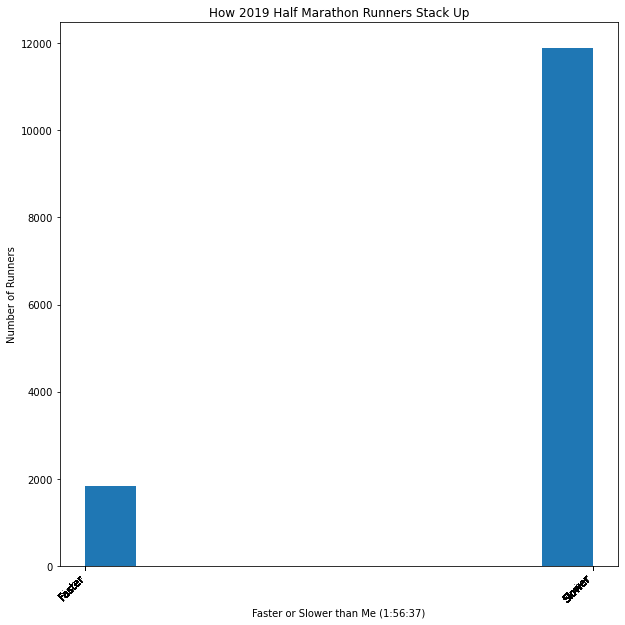

In [39]:
plt.figure(figsize=(10,10))
x = Half_M_19['Faster or Slower than Cory']
plt.hist(x)
plt.xticks(x)
plt.ylabel("Number of Runners")
plt.xlabel("Faster or Slower than Me (1:56:37)")
plt.title("How 2019 Half Marathon Runners Stack Up")
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

<ipython-input-41-b580de963f0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Half_Marathon_18_1['Faster or Slower than Cory'] = 'Faster'
<ipython-input-41-b580de963f0d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Half_Marathon_18_2['Faster or Slower than Cory'] = 'Slower'


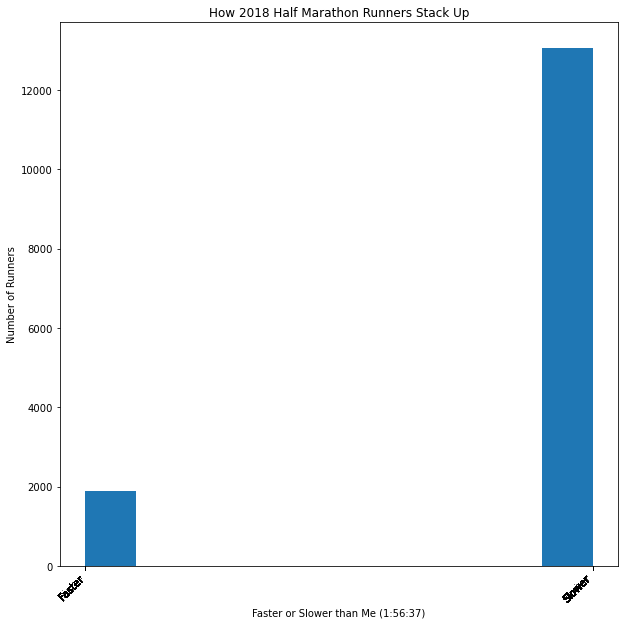

In [41]:
Half_Marathon_18_1['Faster or Slower than Cory'] = 'Faster'
Half_Marathon_18_2['Faster or Slower than Cory'] = 'Slower'
frames2 = [Half_Marathon_18_1, Half_Marathon_18_2]
#result = pd.concat(frames)
Half_M_18 = pd.concat(frames2)
plt.figure(figsize=(10,10))
x = Half_M_18['Faster or Slower than Cory']
plt.hist(x)
plt.xticks(x)
plt.ylabel("Number of Runners")
plt.xlabel("Faster or Slower than Me (1:56:37)")
plt.title("How 2018 Half Marathon Runners Stack Up")
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

<ipython-input-42-f86f7f140aac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Half_Marathon_17_1['Faster or Slower than Cory'] = 'Faster'
<ipython-input-42-f86f7f140aac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Half_Marathon_17_2['Faster or Slower than Cory'] = 'Slower'


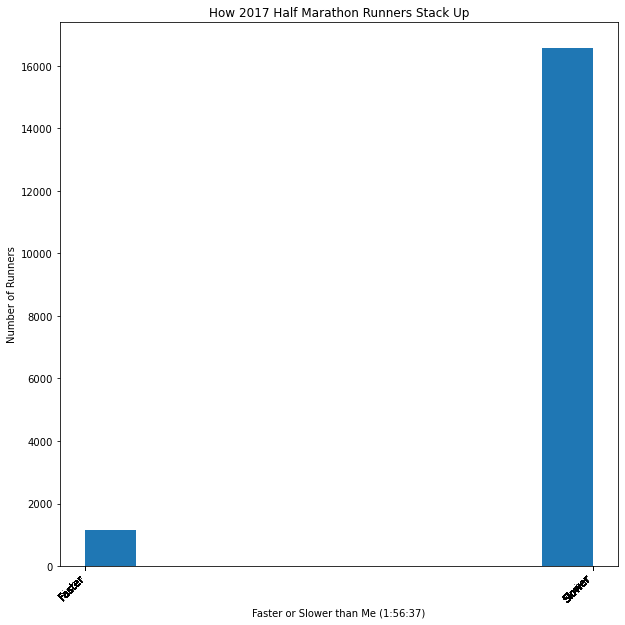

In [42]:
Half_Marathon_17_1['Faster or Slower than Cory'] = 'Faster'
Half_Marathon_17_2['Faster or Slower than Cory'] = 'Slower'
frames3 = [Half_Marathon_17_1, Half_Marathon_17_2]
#result = pd.concat(frames)
Half_M_17 = pd.concat(frames3)
plt.figure(figsize=(10,10))
x = Half_M_17['Faster or Slower than Cory']
plt.hist(x)
plt.xticks(x)
plt.ylabel("Number of Runners")
plt.xlabel("Faster or Slower than Me (1:56:37)")
plt.title("How 2017 Half Marathon Runners Stack Up")
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

<ipython-input-43-52c67a24655e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Half_Marathon_16_1['Faster or Slower than Cory'] = 'Faster'
<ipython-input-43-52c67a24655e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Half_Marathon_16_2['Faster or Slower than Cory'] = 'Slower'


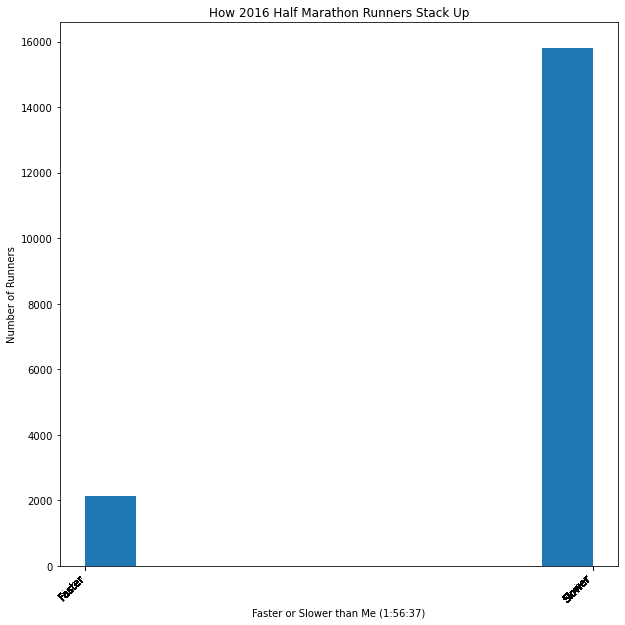

In [43]:
Half_Marathon_16_1['Faster or Slower than Cory'] = 'Faster'
Half_Marathon_16_2['Faster or Slower than Cory'] = 'Slower'
frames4 = [Half_Marathon_16_1, Half_Marathon_16_2]
#result = pd.concat(frames)
Half_M_16 = pd.concat(frames4)
plt.figure(figsize=(10,10))
x = Half_M_16['Faster or Slower than Cory']
plt.hist(x)
plt.xticks(x)
plt.ylabel("Number of Runners")
plt.xlabel("Faster or Slower than Me (1:56:37)")
plt.title("How 2016 Half Marathon Runners Stack Up")
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

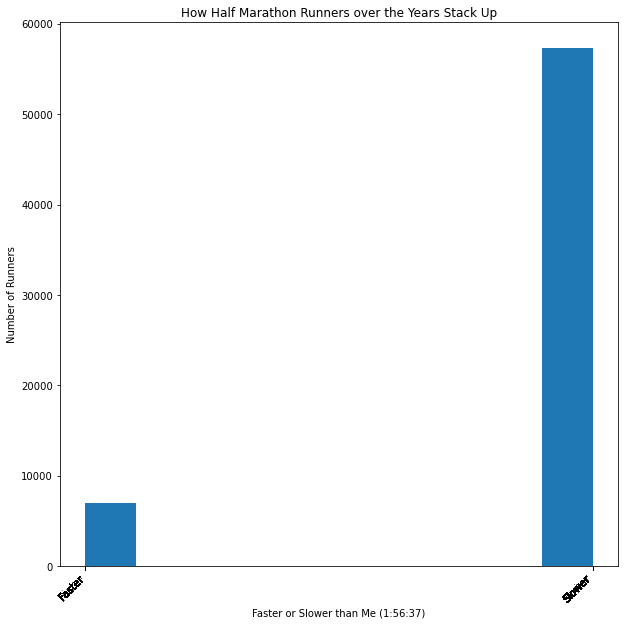

In [44]:
frames_full = [Half_Marathon_19_1, Half_Marathon_19_2,
          Half_Marathon_18_1, Half_Marathon_18_2,
          Half_Marathon_17_1, Half_Marathon_17_2,
          Half_Marathon_16_1, Half_Marathon_16_2]
Half_M = pd.concat(frames_full)
plt.figure(figsize=(10,10))
x = Half_M['Faster or Slower than Cory']
plt.hist(x)
plt.xticks(x)
plt.ylabel("Number of Runners")
plt.xlabel("Faster or Slower than Me (1:56:37)")
plt.title("How Half Marathon Runners over the Years Stack Up")
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()